In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

# Simple house price prediction
df = pd.read_csv('houase price .csv')

In [14]:
# Use only 2 features for extreme simplicity
X = df[['GrLivArea', 'OverallQual']]
y = df['SalePrice']

In [16]:
# Fill missing values
X = X.fillna(X.median())

In [18]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
# Train and predict
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [22]:
# Results
mae = mean_absolute_error(y_test, predictions)
print(f"MAE: ${mae:,.2f}")
print(f"Model Score: {model.score(X_test, y_test):.3f}")

MAE: $29,401.49
Model Score: 0.516


In [24]:
# Quick prediction
price = model.predict([[1500, 7]])[0]
print(f"1500 sqft, Quality 7 house: ${price:,.2f}")

1500 sqft, Quality 7 house: $209,754.81


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


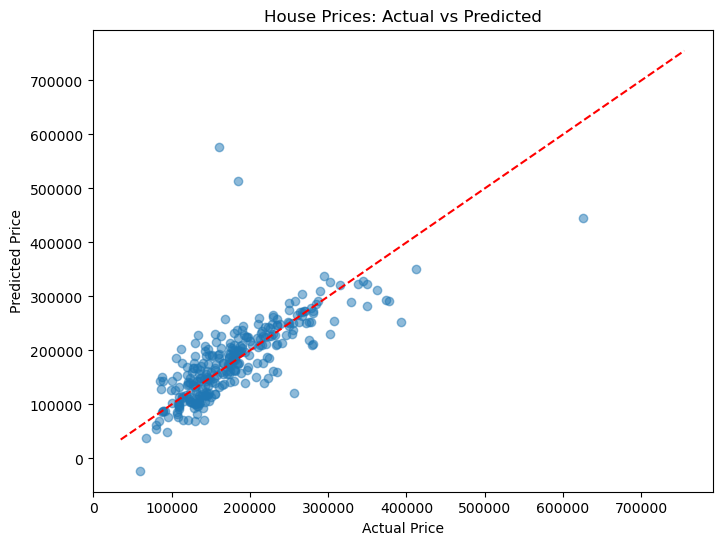

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual Price'); plt.ylabel('Predicted Price')
plt.title('House Prices: Actual vs Predicted')
plt.show()